In [14]:
import numpy as np
import matplotlib.pyplot as plt
from utils.signal_generator import mi_funcion_sen

In [77]:

# parametros de la señal
f = 5
A = 1.25
N = 1000
fs = 1000

In [78]:
time, signal = mi_funcion_sen(vmax=A, dc=0, ff=f, ph=0, nn=N, fs=fs)

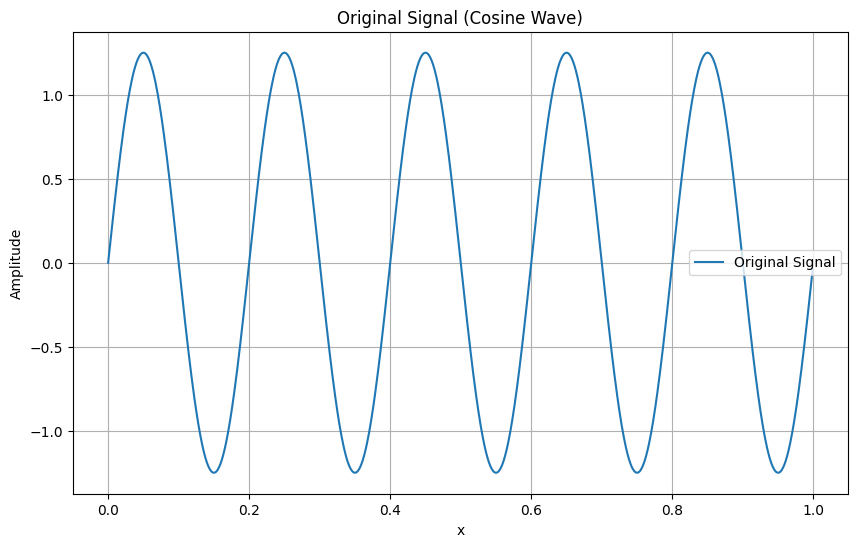

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(time, signal, label='Original Signal')
plt.title('Original Signal (Cosine Wave)')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

In [81]:
def quantize(input_signal, V_f, B):
    # Clip the input signal to be within the range [-V_f, +V_f]
    clipped_signal = np.clip(input_signal, -V_f, V_f)
    
    # Number of levels for a B-bit ADC
    levels = 2 ** B - 1
    
    # Step size (resolution) of the ADC
    step_size = (2 * V_f) / levels
    
    # Convert clipped input signal to digital values
    digital_output = ((clipped_signal + V_f) / step_size).astype(int)
    
    # Ensure output is within the range [0, levels-1]
    digital_output = np.clip(digital_output, 0, levels - 1)
    
    return digital_output

In [97]:
M = 2**2
A = 1.25

qx = (2*A/M) *  np.round( (M/(2*A)) * signal ) 

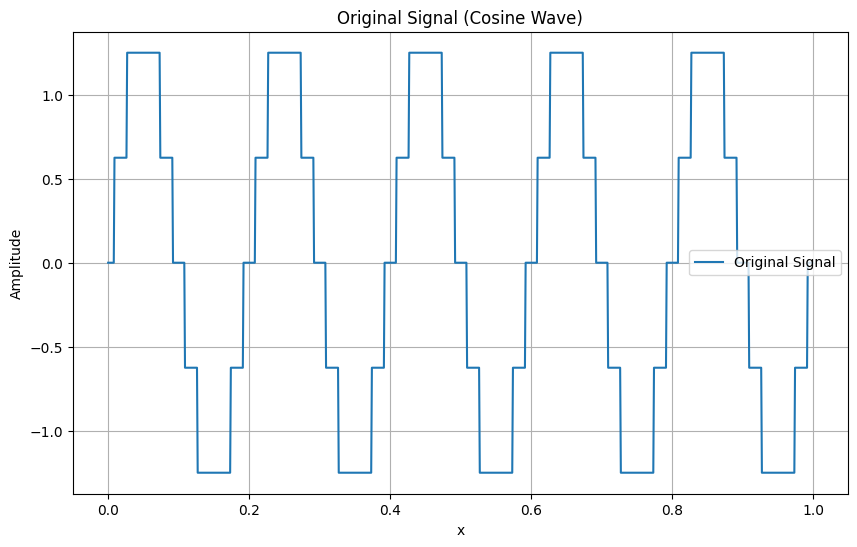

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(time, qx, label='Original Signal')
plt.title('Original Signal (Cosine Wave)')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

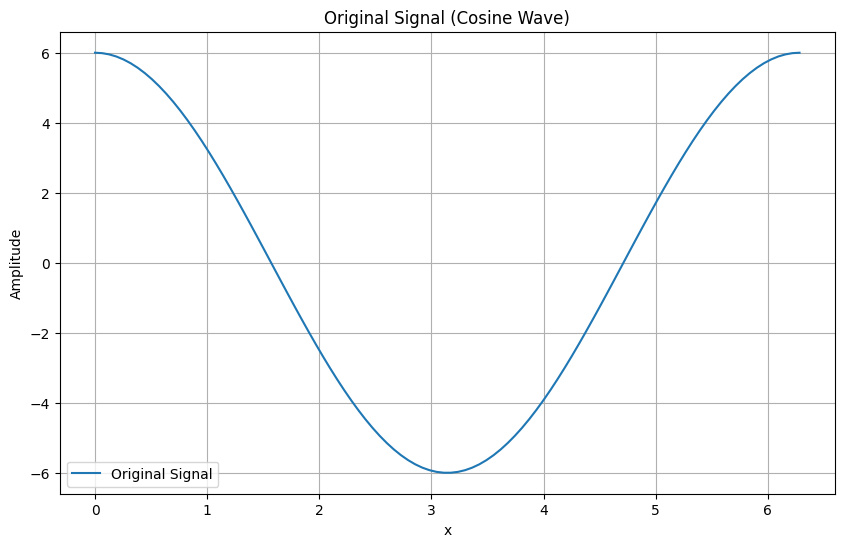

0.26666666666666666


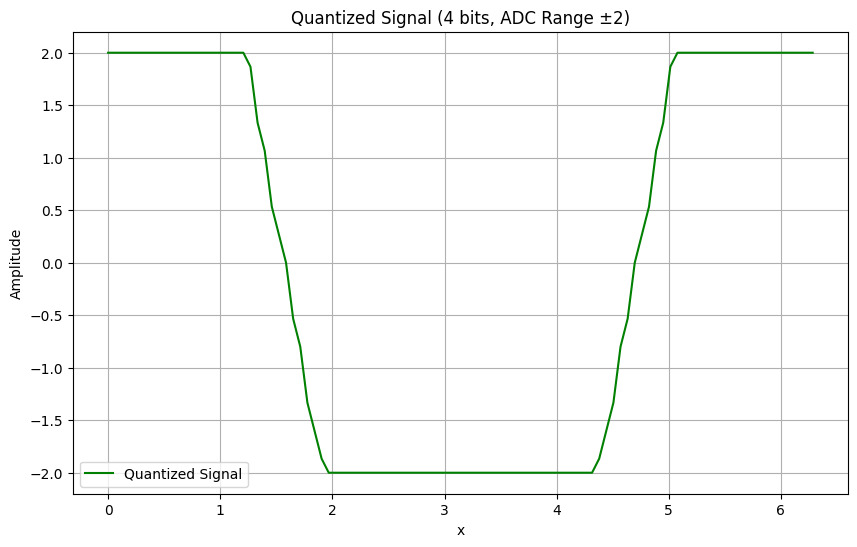

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
b = 4  # Number of bits for quantization
vf = 2  # Amplitude scale for ADC range (±vf)
frequency = 1  # Frequency of the cosine wave
samples = 100  # Number of samples in the signal

# Generate cosine signal
x = np.linspace(0, 2 * np.pi, samples)
signal = 6 *np.cos(frequency * x)  # No scaling by vf here

# Plot Original Signal
plt.figure(figsize=(10, 6))
plt.plot(x, signal, label='Original Signal')
plt.title('Original Signal (Cosine Wave)')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Calculate the LSB (quantization step size) q
q = (2 * vf) / ((2 ** b) - 1 )
print(q)

# Quantize the Signal
quantized_signal = np.round(signal / q) * q

# Clip the quantized signal to the range [-vf, vf]
quantized_signal = np.clip(quantized_signal, -vf, vf)

# Plot Quantized Signal
plt.figure(figsize=(10, 6))
plt.plot(x, quantized_signal, label='Quantized Signal', color='green')
plt.title(f'Quantized Signal ({b} bits, ADC Range ±{vf})')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()